# problem 1 a

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np

In [31]:
column_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
    "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
    "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
    "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
    "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference",
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!",
    "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total", "response"
]

# reading the data and separating the features and response
df = pd.read_csv('C:\\Users\\tanma\\Downloads\\spambase\\spambase.data', header=None, names=column_names)
X = df.iloc[:, :-1] 
y = y = df.iloc[:, -1]

# standardizing the data
means = X.mean(axis = 0)
std_devs = X.std(axis = 0)
for i, col in enumerate(list(X.columns)):
    X[col] = (X[col] - means[i])/std_devs[i]
    
# splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Training the Decision Tree model
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [8]:
# Predicting on both training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [9]:
# Calculating metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_error = 1 - train_accuracy

# Calculating metrics for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_error = 1 - test_accuracy

In [10]:
(train_error, train_accuracy, train_f1, train_auc), (test_error, test_accuracy, test_f1, test_auc)

((0.00031055900621113075,
  0.9996894409937889,
  0.9995953055443141,
  0.9995954692556634),
 (0.08110065170166547,
  0.9188993482983345,
  0.9029462738301559,
  0.9166472662683117))

We have near perfect training metrics. This shows us that the model was able to fit the training data well. Even the test metrics are good which shows us that the model has generalized well. There is a small difference between the metrics for training and testing which indicates some overfitting but the model performance is still satisfactory.

# Problem 1 b

In [11]:
# Training the Decision Tree model with Gini index as the splitting criterion
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Predicting on both training and testing sets with the new model
y_train_pred_gini = clf_gini.predict(X_train)
y_test_pred_gini = clf_gini.predict(X_test)

# Calculating metrics for training data with Gini index
train_accuracy_gini = accuracy_score(y_train, y_train_pred_gini)
train_f1_gini = f1_score(y_train, y_train_pred_gini)
train_auc_gini = roc_auc_score(y_train, y_train_pred_gini)
train_error_gini = 1 - train_accuracy_gini

# Calculating metrics for testing data with Gini index
test_accuracy_gini = accuracy_score(y_test, y_test_pred_gini)
test_f1_gini = f1_score(y_test, y_test_pred_gini)
test_auc_gini = roc_auc_score(y_test, y_test_pred_gini)
test_error_gini = 1 - test_accuracy_gini

(train_error_gini, train_accuracy_gini, train_f1_gini, train_auc_gini), (test_error_gini, test_accuracy_gini, test_f1_gini, test_auc_gini)

((0.00031055900621113075,
  0.9996894409937889,
  0.9995953055443141,
  0.9995954692556634),
 (0.10065170166545978,
  0.8993482983345402,
  0.8794449262792715,
  0.8964309733826535))

On the training data, both the models have the same performance. However, on the test data, the information gain based model performs better than the gini index based model. Hence, the information gain based model has slightly better generalization.

# Problem 1 c

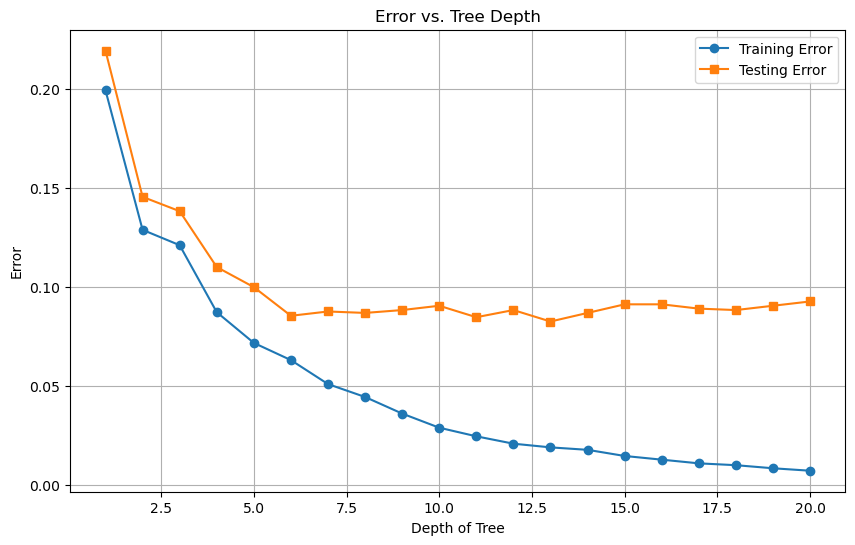

In [12]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define a range of tree depths to evaluate
max_depths = range(1, 21)
train_errors = []
test_errors = []

# Train and evaluate a decision tree for each depth
for depth in max_depths:
    clf_depth = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    clf_depth.fit(X_train, y_train)
    
    # Predict and calculate error for both training and testing sets
    y_train_pred_depth = clf_depth.predict(X_train)
    y_test_pred_depth = clf_depth.predict(X_test)
    
    train_error_depth = 1 - accuracy_score(y_train, y_train_pred_depth)
    test_error_depth = 1 - accuracy_score(y_test, y_test_pred_depth)
    
    # Append errors to lists
    train_errors.append(train_error_depth)
    test_errors.append(test_error_depth)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Training Error', marker='o')
plt.plot(max_depths, test_errors, label='Testing Error', marker='s')
plt.title('Error vs. Tree Depth')
plt.xlabel('Depth of Tree')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


In the above graph we can see that the error reduces as the depth of the tree increases. This is becuase as the depth of the tree increases, the model complexity increases and the model is able to classify the data better. However, after a depth of 6 levels, the testing error levels off. This means that the best depth is 6 levels. After this what the model learns is not generalizable. Instead, it overfits the training data.

# Problem 1 d

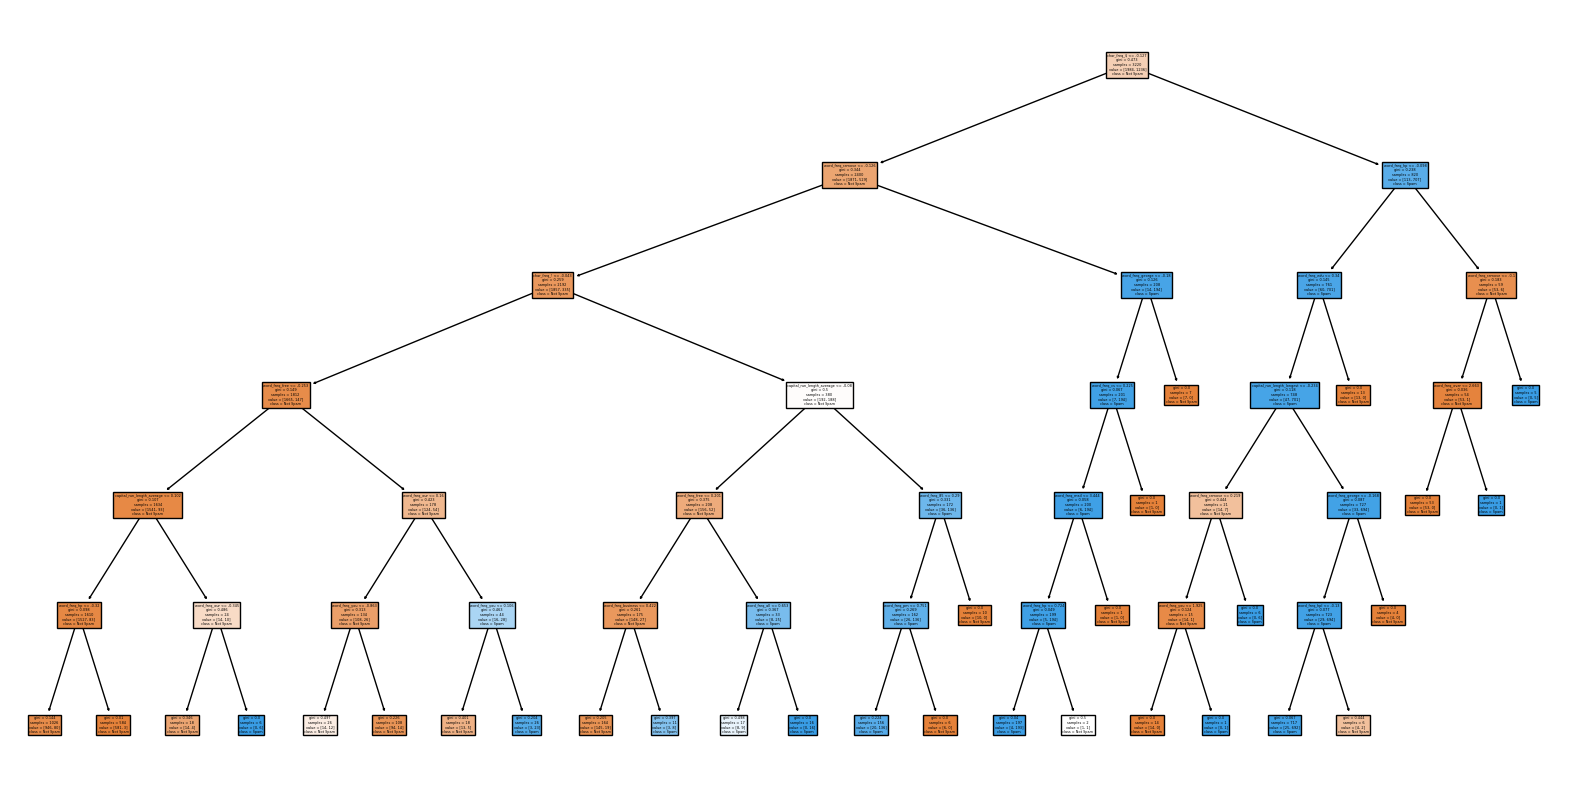

In [15]:
from sklearn.tree import plot_tree

# Train the decision tree model with the optimal depth identified previously
optimal_depth = 6
clf_optimal = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)
clf_optimal.fit(X_train, y_train)

# Visualizing the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_optimal, filled=True, feature_names=column_names, class_names=["Not Spam", "Spam"], max_depth=optimal_depth)
plt.show()


# paste better tree image from ds4400 folder

# Problem 2 a

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Number of trees to evaluate
n_trees = [10, 50, 100, 500]

# Store metrics for each number of trees
metrics = {}

# Train Random Forest model and evaluate metrics for each number of trees
for n in n_trees:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    
    # Predictions
    y_train_pred_rf = rf_clf.predict(X_train)
    y_test_pred_rf = rf_clf.predict(X_test)
    
    # Calculate metrics
    metrics[n] = {
        'train_accuracy': accuracy_score(y_train, y_train_pred_rf),
        'test_accuracy': accuracy_score(y_test, y_test_pred_rf),
        'train_f1': f1_score(y_train, y_train_pred_rf),
        'test_f1': f1_score(y_test, y_test_pred_rf),
        'train_auc': roc_auc_score(y_train, y_train_pred_rf),
        'test_auc': roc_auc_score(y_test, y_test_pred_rf),
    }

metrics


{10: {'train_accuracy': 0.9953416149068323,
  'test_accuracy': 0.944243301955105,
  'train_f1': 0.9938999593330622,
  'test_f1': 0.931433659839715,
  'train_auc': 0.9940845534502558,
  'test_auc': 0.9389027565810463},
 50: {'train_accuracy': 0.9996894409937889,
  'test_accuracy': 0.9572773352643013,
  'train_f1': 0.9995956328346138,
  'test_f1': 0.9478337754199823,
  'train_auc': 0.9997479838709677,
  'test_auc': 0.9532773739620788},
 100: {'train_accuracy': 0.9996894409937889,
  'test_accuracy': 0.9565532223026793,
  'train_f1': 0.9995956328346138,
  'test_f1': 0.9469026548672567,
  'train_auc': 0.9997479838709677,
  'test_auc': 0.9524108228355622},
 500: {'train_accuracy': 0.9996894409937889,
  'test_accuracy': 0.9551049963794352,
  'train_f1': 0.9995956328346138,
  'test_f1': 0.945326278659612,
  'train_auc': 0.9997479838709677,
  'test_auc': 0.9514117023202877}}

# Problem 2 b

We see the best generalization when the number of trees is set to 50. This is when the model has the best training and testing scores. We also see a slight dip in the testing metrics for 100 and 500 trees. This is a sign of overfitting and this tells us that increasing the number of trees beyond T = 50 does not help the generalizability of the model.

# Problem 2 c

Feature ranking:
1. feature 51 (0.11513415011519577)
2. feature 52 (0.0983606717138959)
3. feature 6 (0.08483284331513949)
4. feature 54 (0.06594868281248958)
5. feature 15 (0.06553294015851582)
6. feature 20 (0.056005736039980485)
7. feature 55 (0.053624158738846475)
8. feature 56 (0.04422211878198207)
9. feature 24 (0.041001189292311294)
10. feature 23 (0.035312661539613925)
11. feature 4 (0.033113315542482785)
12. feature 18 (0.03043097334783203)
13. feature 22 (0.02373484396871416)
14. feature 26 (0.022250212068051466)
15. feature 25 (0.01623469996046238)
16. feature 45 (0.015117941277852128)
17. feature 7 (0.014533327030433712)
18. feature 36 (0.013171904934439274)
19. feature 49 (0.012476836910945022)
20. feature 16 (0.012140175336629325)
21. feature 11 (0.01195293830668999)
22. feature 44 (0.010389714012460118)
23. feature 2 (0.009871934189126533)
24. feature 5 (0.008733914237937767)
25. feature 10 (0.0080555819837164)
26. feature 9 (0.007857161199352244)
27. feature 17 (0.00764

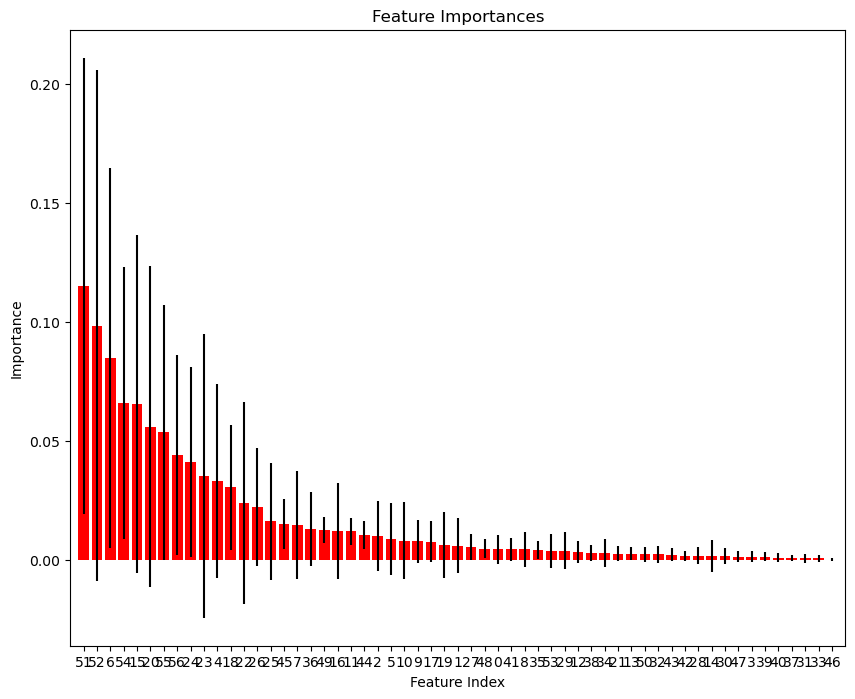

In [17]:
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

# Problem 3 a

In [5]:
from sklearn.ensemble import AdaBoostClassifier
# Define the number of base classifiers for AdaBoost
n_estimators_list = [10, 50, 100, 500]

# Initialize dictionaries to store the performance metrics
performance_metrics = {
    "n_estimators": [],
    "train_accuracy": [],
    "test_accuracy": [],
    "train_f1": [],
    "test_f1": [],
    "train_auc": [],
    "test_auc": []
}

# Train AdaBoost models with the specified number of base classifiers
for n_estimators in n_estimators_list:
    # AdaBoost with a decision tree as the base classifier
    adb_clf = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_estimators,
        random_state=42
    )
    
    # Train the model
    adb_clf.fit(X_train, y_train)
    
    # Predictions for training and testing sets
    y_train_pred = adb_clf.predict(X_train)
    y_test_pred = adb_clf.predict(X_test)
    
    # Probabilities for AUC
    y_train_proba = adb_clf.predict_proba(X_train)[:, 1]
    y_test_proba = adb_clf.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_auc = roc_auc_score(y_train, y_train_proba)
    test_auc = roc_auc_score(y_test, y_test_proba)
    
    # Store metrics
    performance_metrics["n_estimators"].append(n_estimators)
    performance_metrics["train_accuracy"].append(train_accuracy)
    performance_metrics["test_accuracy"].append(test_accuracy)
    performance_metrics["train_f1"].append(train_f1)
    performance_metrics["test_f1"].append(test_f1)
    performance_metrics["train_auc"].append(train_auc)
    performance_metrics["test_auc"].append(test_auc)

performance_df = pd.DataFrame(performance_metrics)
performance_df


C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,n_estimators,train_accuracy,test_accuracy,train_f1,test_f1,train_auc,test_auc
0,10,0.924534,0.920348,0.900123,0.901786,0.968735,0.967276
1,50,0.944099,0.933382,0.926531,0.919014,0.989372,0.978605
2,100,0.957143,0.940623,0.944084,0.928571,0.993636,0.981234
3,500,0.990373,0.931933,0.987444,0.918261,0.999607,0.975847


# Problem 3 b

Random forests provide better generalization than AdaBoost as Random Forests have better accuracy on the testing data than AdaBoost. Hence, we can see that AdaBoost is more sensitive to the noise in the training data and overfits. Additionally, Random Forests need only 50 decision trees to get optimal performance but with AdaBoost, 100 trees are needed to achieve optimal peformance.  

# Problem 3 c

C:\Users\tanma\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


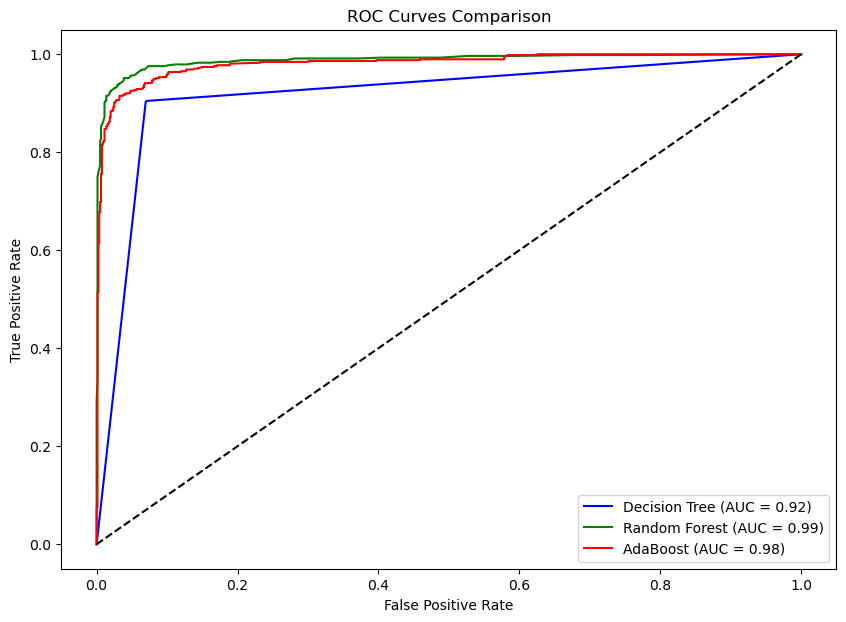

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# For the Decision Tree
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_clf.fit(X_train, y_train)
y_test_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

# For Random Forest with 100 trees
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_test_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# For AdaBoost with 100 trees
adb_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
adb_clf.fit(X_train, y_train)
y_test_proba_adb = adb_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
fpr_adb, tpr_adb, _ = roc_curve(y_test, y_test_proba_adb)

# Calculate AUC
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_adb = auc(fpr_adb, tpr_adb)

# Plotting the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot(fpr_adb, tpr_adb, label=f'AdaBoost (AUC = {auc_adb:.2f})', color='red')

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()

# Problem 4 a

In [32]:
import pandas as pd

dataset_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

mushroom_data = pd.read_csv(dataset_url, names=column_names)
print(mushroom_data.head())

  class cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0     p         x           s         n        t    p               f   
1     e         x           s         y        t    a               f   
2     e         b           s         w        t    l               f   
3     p         x           y         w        t    p               f   
4     e         x           s         g        f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1 

In [53]:
X = mushroom_data.drop('class', axis=1)  # Features
y = mushroom_data['class']  # Target variable

from collections import defaultdict
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(mushroom_data['class'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

encoder_dict = defaultdict(LabelEncoder)
train_df_encoded = X_train.apply(lambda x: encoder_dict[x.name].fit_transform(x))
test_df_encoded = X_test.apply(lambda x: encoder_dict[x.name].transform(x))

In [52]:
prior_probabilities = y_train.value_counts(normalize=True)

# Problem 4 b

In [55]:
conditional_probabilities = {
    'Edible': defaultdict(lambda: defaultdict(lambda: 0)),
    'Poisonous': defaultdict(lambda: defaultdict(lambda: 0))
}
alpha = 1
n_features = X_train.shape[1]

In [57]:
import numpy as np
for feature in X_train.columns:
    feature_values = X_train[feature].unique()
    for class_val in np.unique(y_train):
        class_subset = X_train[y_train == class_val]
        total_class_instances = class_subset.shape[0]
        for value in feature_values:
            value_count = class_subset[feature].value_counts().get(value, 0)
            prob = (value_count + alpha) / (total_class_instances + alpha * len(feature_values))
            if class_val == 0:  # Edible
                conditional_probabilities['Edible'][feature][value] = prob
            else:  # Poisonous
                conditional_probabilities['Poisonous'][feature][value] = prob


In [83]:
def calculate_class_probabilities(instance, prior_probabilities, conditional_probabilities):
    # Initialize probabilities of the instance belonging to each class
    class_probabilities = {
        'Edible': prior_probabilities[0],
        'Poisonous': prior_probabilities[1]
    }

    # Multiply by conditional probabilities for each feature value
    for feature in instance.index:
        value = instance[feature]
        class_probabilities['Edible'] *= conditional_probabilities['Edible'][feature][value]
        class_probabilities['Poisonous'] *= conditional_probabilities['Poisonous'][feature][value]

    return class_probabilities

predictions = []
for idx, row in X_test.iterrows():
    probabilities = calculate_class_probabilities(row, prior_probabilities, conditional_probabilities)    
    predicted_class = 0 if probabilities['Edible'] > probabilities['Poisonous'] else 1
    predictions.append(predicted_class)

print(predictions[:20])

[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


# Problem 4 c

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

accuracy, precision, recall, f1

(0.9487936976858691,
 0.9900552486187846,
 0.9041372351160444,
 0.9451476793248945)

# Problem 4 d

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb_classifier = GaussianNB()
nb_classifier.fit(train_df_encoded, y_train)

y_pred = nb_classifier.predict(test_df_encoded)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1

(0.9266371245691778,
 0.9184890656063618,
 0.9323915237134208,
 0.9253880821231847)